In [62]:
# https://towardsdatascience.com/clustering-documents-with-python-97314ad6a78d

import pandas as pd
import re

In [63]:
# load the sample of all public tweets about Ukraine
tweets_df = pd.read_csv("combined\\sampled.csv", encoding="utf-8")
tweets_df.rename(columns = {'language':'lang', 'text':'full_text', 'tweetcreatedts': 'created_at',
                            'retweetcount': 'retweet_count'}, inplace=True)


In [64]:
full_text_list = list(tweets_df["full_text"])
for i in range(len(full_text_list)):
   full_text_list[i] = re.sub(r'http\S+', '', full_text_list[i])
full_text_list

['The Russian-controlled #Zaporizhzhia nuclear plant in #Ukraine has lost its link to its last remaining main power line, the #UN nuclear watchdog said.\n',
 "@BTSLovermuskan1 I'm fine. How are you?",
 'This week on The Purrfect Afternoon, PJ will be chatting to Gary Fear (on Tuesday) about his experiences taking food to #Ukraine and to Gareth Roberts (Wednesday) about his time as a firefighter at Crewe Fire Station.\n#ProperLocalRadio for #Crewe #Nantwich #Sandbach ',
 'THINGS TO ALWAYS KEEP IN MIND:  #News #Philippines #Israel #UAE #China #Russia #India #Japan #SouthKorea #Mexico #UK #Germany #Ukraine #France #Iran #Canada #Italy #Emirates #EU #Australia #Denmark #RussianFederation #GreatBritain #SaudiArabia #Brazil ',
 '@Nervana_1 @NATO @jensstoltenberg I still can’t believe this tweet.\nA British Egyptian &amp; so called commentator officially make fuss &amp; whine about a #NATO member.\nWhere is her editor-in-chief ???',
 'All those missiles #Russia launched on #Ukraine cost USD $

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words={'english'})
X = vectorizer.fit_transform(full_text_list)

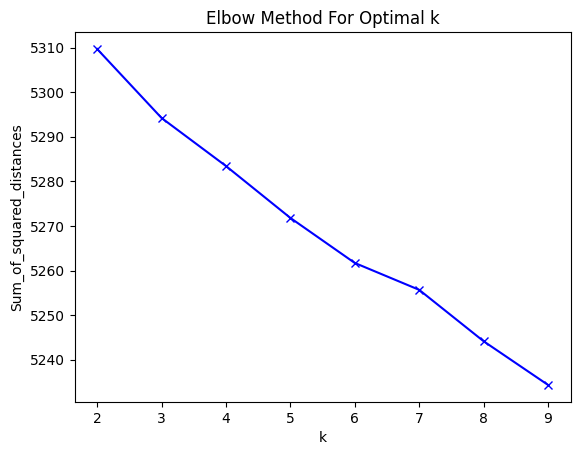

In [73]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Sum_of_squared_distances = []
K = range(2,10)
for k in K:
   km = KMeans(n_clusters=k, max_iter=200, n_init=10)
   km = km.fit(X)
   Sum_of_squared_distances.append(km.inertia_)
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [67]:
true_k = 6
model = KMeans(n_clusters=true_k, init='k-means++', max_iter=200, n_init=10)
model.fit(X)
labels=model.labels_
wiki_cl=pd.DataFrame(list(zip('title',labels)),columns=['title','cluster'])
print(wiki_cl.sort_values(by=['cluster']))

  title  cluster
1     i        0
3     l        0
4     e        0
2     t        1
0     t        2


Cluster: 0
Titles
i
l
e


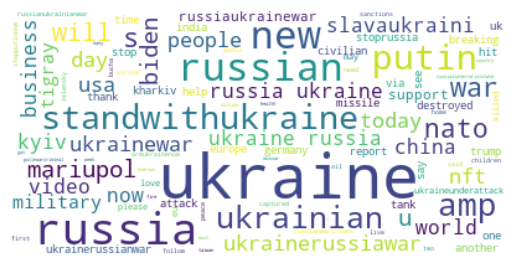

Cluster: 1
Titles
t


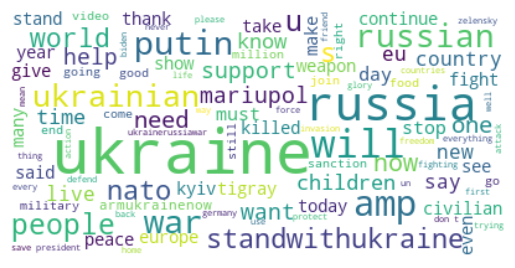

Cluster: 2
Titles
t


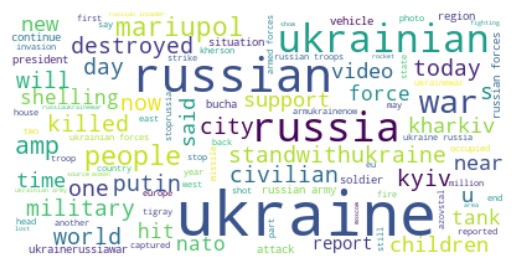

In [68]:
from wordcloud import WordCloud
result={'cluster':labels,'wiki':full_text_list}
result=pd.DataFrame(result)
for k in range(0,true_k):
   s=result[result.cluster==k]
   text=s['wiki'].str.cat(sep=' ')
   text=text.lower()
   text=' '.join([word for word in text.split()])
   wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(text)
   print('Cluster: {}'.format(k))
   print('Titles')
   titles=wiki_cl[wiki_cl.cluster==k]['title']
   print(titles.to_string(index=False))
   plt.figure()
   plt.imshow(wordcloud, interpolation="bilinear")
   plt.axis("off")
   plt.show()